In [1]:
import matplotlib.pyplot as plt
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import datasets
from sklearn.datasets import load_breast_cancer

#Additional packages loaded
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

(a) Use the breast cancer data set from Homework 0 to create a training set.
Recall that the label is 0 if the patient has breast cancer and 1 otherwise.
Compute the base rate of cancer occurrence over the entire data set.

In [2]:
#Function for converting breast cancer data into a Pandas dataframe
def cancer_df():
    cancer = load_breast_cancer()     
    data = np.c_[cancer.data, cancer.target]
    columns = np.append(cancer.feature_names, ["target"])
    return pd.DataFrame(data, columns=columns)
df = cancer_df()
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
#Checking the value counts of the target variable
# 0 = breast cancer
# 1 = not cancer
df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [4]:
#Calculate the rate of breast cancer to number of observations
rate = round((1-sum(df['target'])/len(df['target'])) * 100,2)
print("The base rate occurrence of cancer is " + str(rate) + "%.")

The base rate occurrence of cancer is 37.26%.


**On random seeds:** Many functions in scikit-learn, including models as well as utilities,
use randomization. For ease of grading, we will fix a random seed (we will use 101 throughout)
so as to make behavior deterministic. This can generally be done by passing in `random_state=101` to
the function; please consult documentation if unsure. Note to peer graders: this is purely for grading
convenience. Do not penalize harshly if the random seed has not been set properly.

(b) The goal is to build a decision tree that, based on the other features in the set,
predicts whether or not a patient has cancer.  So this is a classification problem.
Using tree.DecisionTreeClassifier and other functions in the scikit-learn library, one can
build a decision tree and calculate both its training accuracy when fitted to the entire data set
as well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).

Vary the depth of your decision tree (use max_depth = $1, 2, \dots, 10$) and plot both training
accuracy and cross-validated accuracy (as a function of the depth, on the x-axis). Use 101 as your
random seed. Plot both curves on the same plot and use a legend to label them.

In [5]:
#Separate the predictor and target variables
X = df.iloc[:, 0:29]
y = df.iloc[:, 30]

[]

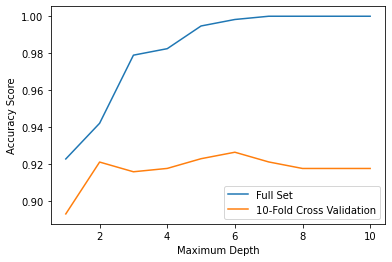

In [6]:
max_depth = range(1,11,1)
max_depth_list = list(max_depth)

full_score = [] 
cv_score = []

for i in max_depth_list:
    #Decision tree on full dataset
    dt = tree.DecisionTreeClassifier(max_depth=i, random_state=101) 
    dt.fit(X,y)
    full_pred = dt.predict(X)
    full_score.append(accuracy_score(y,full_pred))
    #Decision tree using 10-fold cross validation
    scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
    dt_cv = np.mean(scores)
    cv_score.append(dt_cv)

#Plot results
x = np.arange(len(max_depth_list)) + 1
plt.plot(x, full_score, label='Full Set')
plt.plot(x, cv_score, label='10-Fold Cross Validation')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.plot()

(c) Now try the random forest classifier of the scikit-learn library and use the best
depth you get from (b) as max_depth. Vary the number of trees in the forest via the parameter
n_estimators and plot its 10-fold cross-validated accuracy (use n_estimators = $1, 2, \dots, 20$).
Again, use 101 as your random seed. Do you see an improvement using random forests versus
using a single tree? (Note: use the n_estimators=1 result as the result for a single tree.)

**The best score from the 10-fold model came from using a max_depth of 6.  Since the improved returns in the full data set were minimal after using the same depth, the random forest model will use a max_depth of 6 also.**

[]

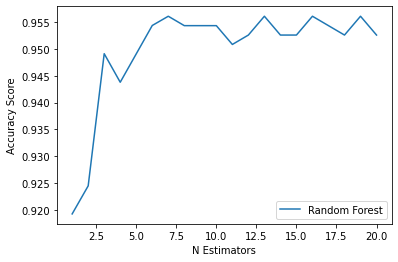

In [7]:
n_estimators = range(1,21,1)
n_estimators_list = list(n_estimators)

rf_score = [] 

for i in n_estimators_list:
    #Random forest on n_estimators list
    rf = ensemble.RandomForestClassifier(n_estimators=i, max_depth=6, random_state=101) 
    rf.fit(X,y)
    scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
    rf_cv = np.mean(scores)
    rf_score.append(rf_cv)

#Plot results
x = np.arange(len(n_estimators)) + 1
plt.plot(x, rf_score, label='Random Forest')
plt.xlabel('N Estimators')
plt.ylabel('Accuracy Score')
plt.legend()
plt.plot()

**The random forest model improves upon the decision tree almost immediately.  While the decision tree accuracy howver within the .895 to .925 range, the random forest accuracy is consistently in the .945 to .955 range.**

(d) Using the method for building a decision tree you used in part (b), build a tree
but randomly hold out a $.2$,$.4$,$.6$, and $.8$ fraction of the data set (so you 
will need to build 4 different trees for each depth value). Use 101 as your random seed for both
the train-test split as well as the decision tree.
For each fraction held out, plot a curve of the test accuracy (the accuracy on the held-out
set) against depth. You should have four curves. Plot them all on the same plot and use
a legend to label them.

[]

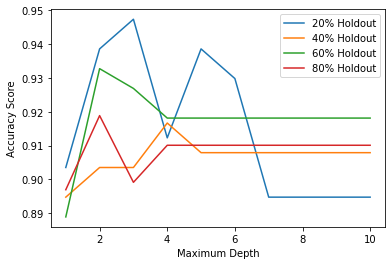

In [8]:
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size = 0.20, random_state=101)
X_train_40, X_test_40, y_train_40, y_test_40 = train_test_split(X, y, test_size = 0.40, random_state=101)
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X, y, test_size = 0.60, random_state=101)
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size = 0.80, random_state=101)

max_depth = range(1,11,1)
max_depth_list = list(max_depth)

test_score_20 = [] 
test_score_40 = [] 
test_score_60 = [] 
test_score_80 = [] 

for i in max_depth_list:
    dt = tree.DecisionTreeClassifier(max_depth=i, random_state=101)
    #Run decision tree for 20% split
    dt.fit(X_train_20,y_train_20)
    pred_20 = dt.predict(X_test_20)
    test_score_20.append(accuracy_score(y_test_20, pred_20))
    #Run decision tree for 40% split
    dt.fit(X_train_40,y_train_40)
    pred_40 = dt.predict(X_test_40)
    test_score_40.append(accuracy_score(y_test_40, pred_40))
    #Run decision tree for 60% split
    dt.fit(X_train_60,y_train_60)
    pred_60 = dt.predict(X_test_60)
    test_score_60.append(accuracy_score(y_test_60, pred_60))
    #Run decision tree for 80% split
    dt.fit(X_train_80,y_train_80)
    pred_80 = dt.predict(X_test_80)
    test_score_80.append(accuracy_score(y_test_80, pred_80))

#Plot results
x = np.arange(len(max_depth_list)) + 1
plt.plot(x, test_score_20, label='20% Holdout')
plt.plot(x, test_score_40, label='40% Holdout')
plt.plot(x, test_score_60, label='60% Holdout')
plt.plot(x, test_score_80, label='80% Holdout')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.plot()

**Early on, the 20% holdout set performs best.  However, the accuracy decreases as the max_depth increases.  Overall, the 60% holdout set performs best.  For each decision tree, there appears to be diminishing returns on test set accuracy once the depth becomes greater than 4.**